In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


from pylab import rcParams


import numpy as np


import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split,GridSearchCV

import seaborn as Sns

In [2]:
data = pd.read_csv("Pokemon.csv")

In [3]:
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [4]:
data.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [5]:
data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
data = data.fillna('None')
data.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

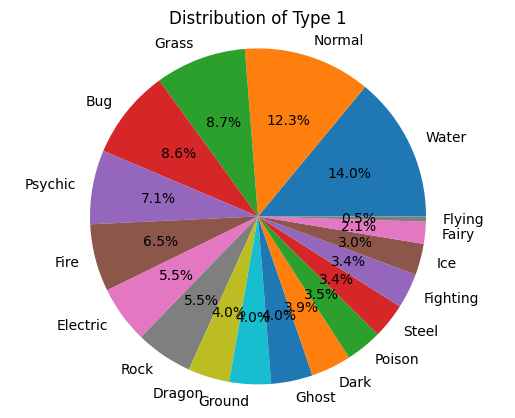

In [7]:
# Count the occurrences of each category in the "Type 1" column
type_counts = data['Type 1'].value_counts()

# Plot a pie chart
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Type 1")
plt.axis('equal')  # Ensure pie is drawn as a circle
plt.show()

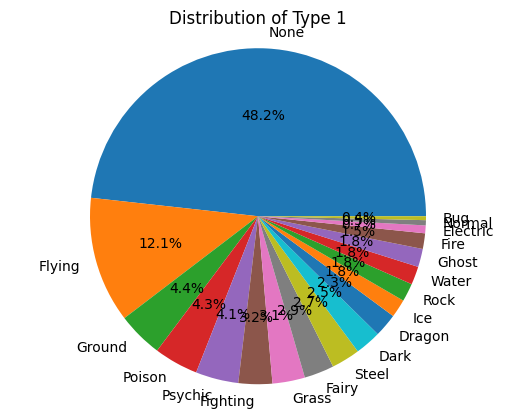

In [8]:
type_counts = data['Type 2'].value_counts()

# Plot a pie chart
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Type 1")
plt.axis('equal')  # Ensure pie is drawn as a circle
plt.show()

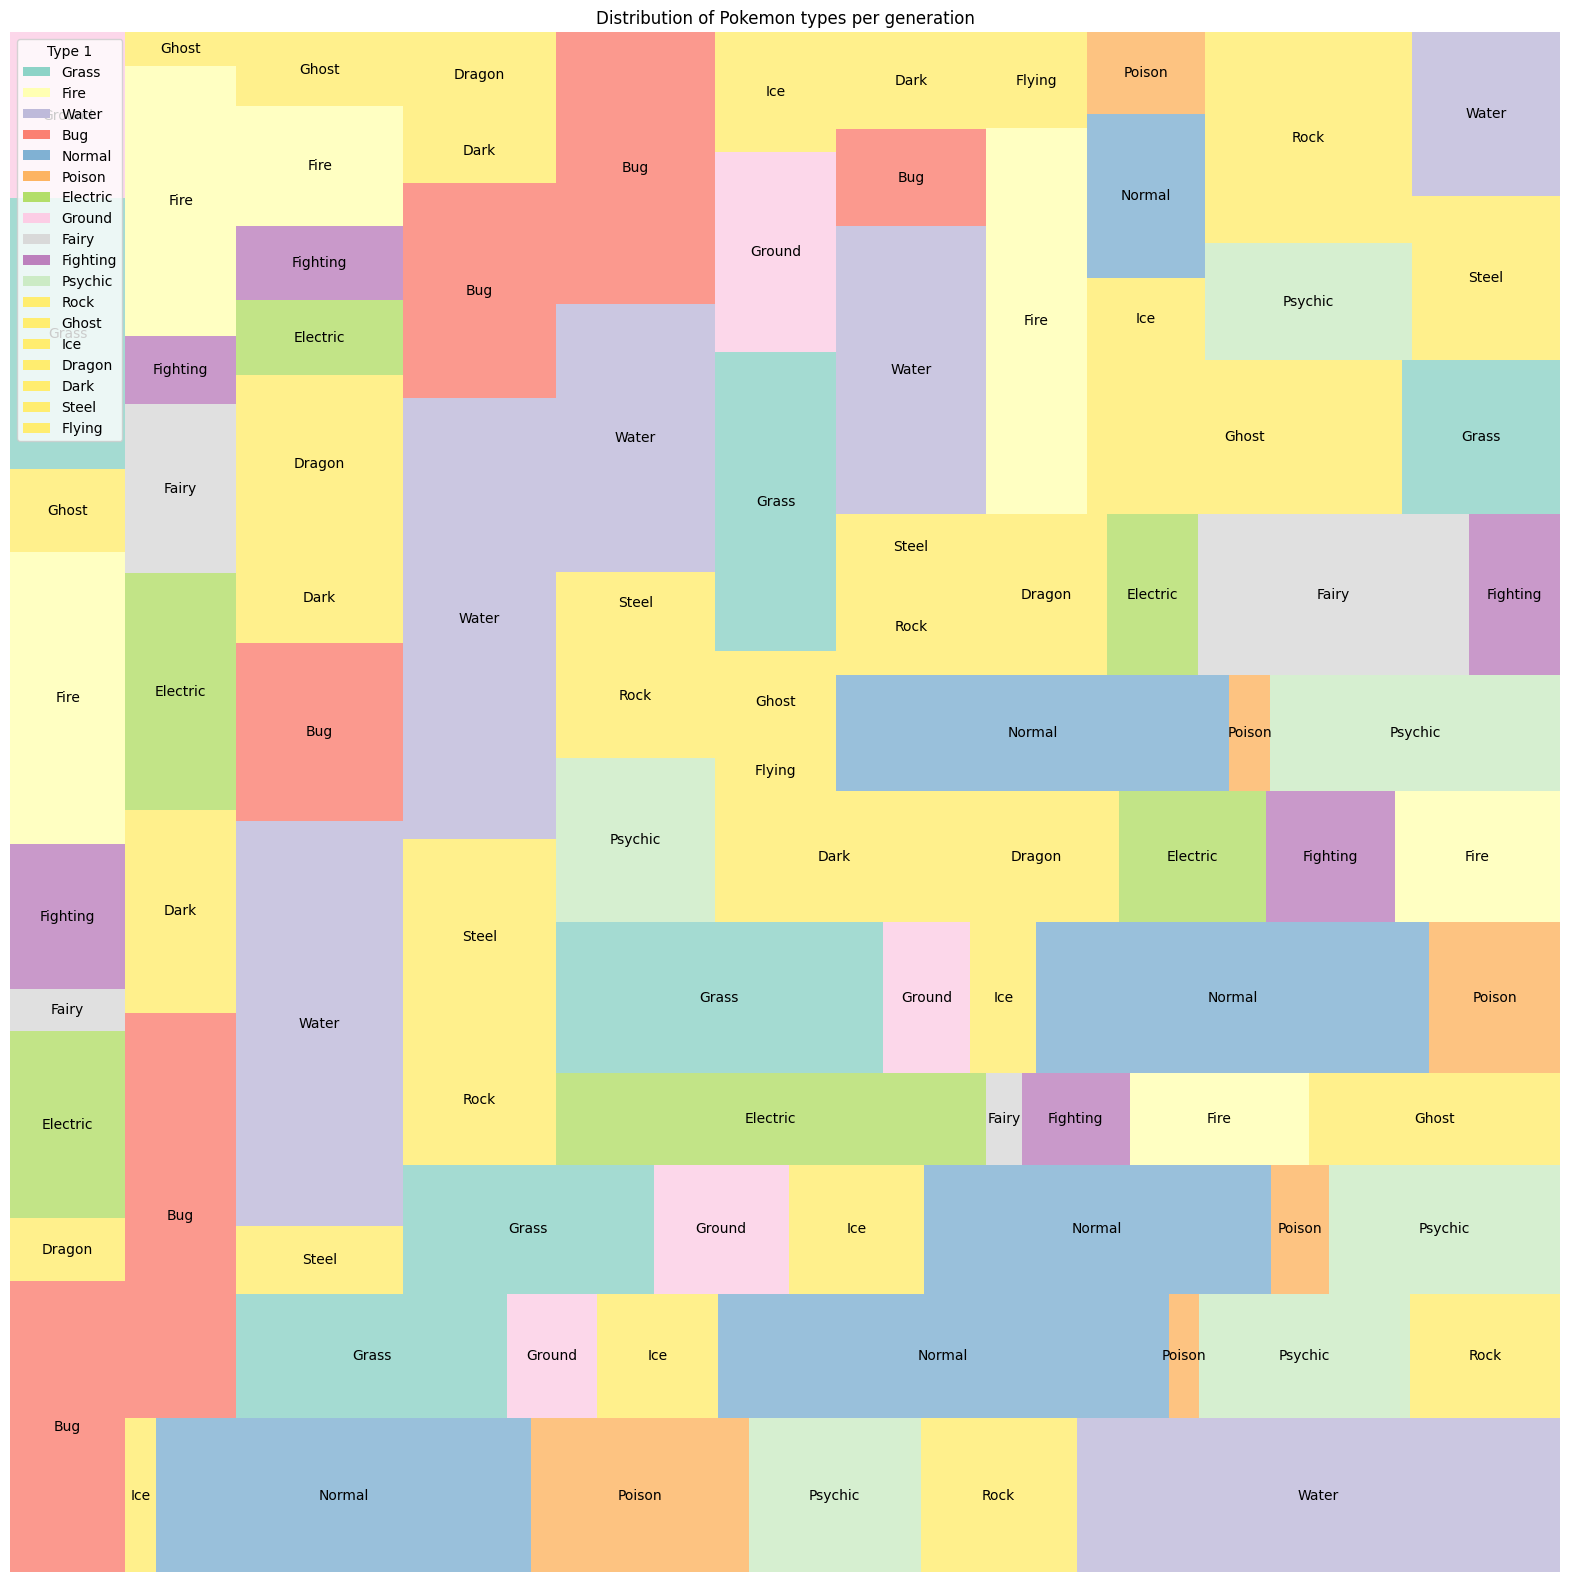

In [9]:
!pip install squarify
import matplotlib.pyplot as plt
import squarify

# Calculate the proportion of each type within each generation
generation_counts = data.groupby(['Generation', 'Type 1']).size().reset_index(name='Count')
generation_counts['Proportion'] = generation_counts['Count'] / generation_counts.groupby('Generation')['Count'].transform('sum')

# Assign unique colors to each type
type_colors = {type_: plt.cm.Set3(i) for i, type_ in enumerate(data['Type 1'].unique())}

# Create the sunburst chart
fig, ax = plt.subplots(figsize=(20, 20))
squarify.plot(sizes=generation_counts['Proportion'], label=generation_counts['Type 1'], color=[type_colors[type_] for type_ in generation_counts['Type 1']], alpha=0.8, ax=ax)

# Set labels and title
ax.set_title('Distribution of Pokemon types per generation')
ax.axis('off')

# Create custom legend
legend_elements = [plt.Rectangle((0, 0), 1, 1, fc=type_colors[type_]) for type_ in data['Type 1'].unique()]
ax.legend(legend_elements, data['Type 1'].unique(), title='Type 1')

# Show the sunburst chart
plt.show()

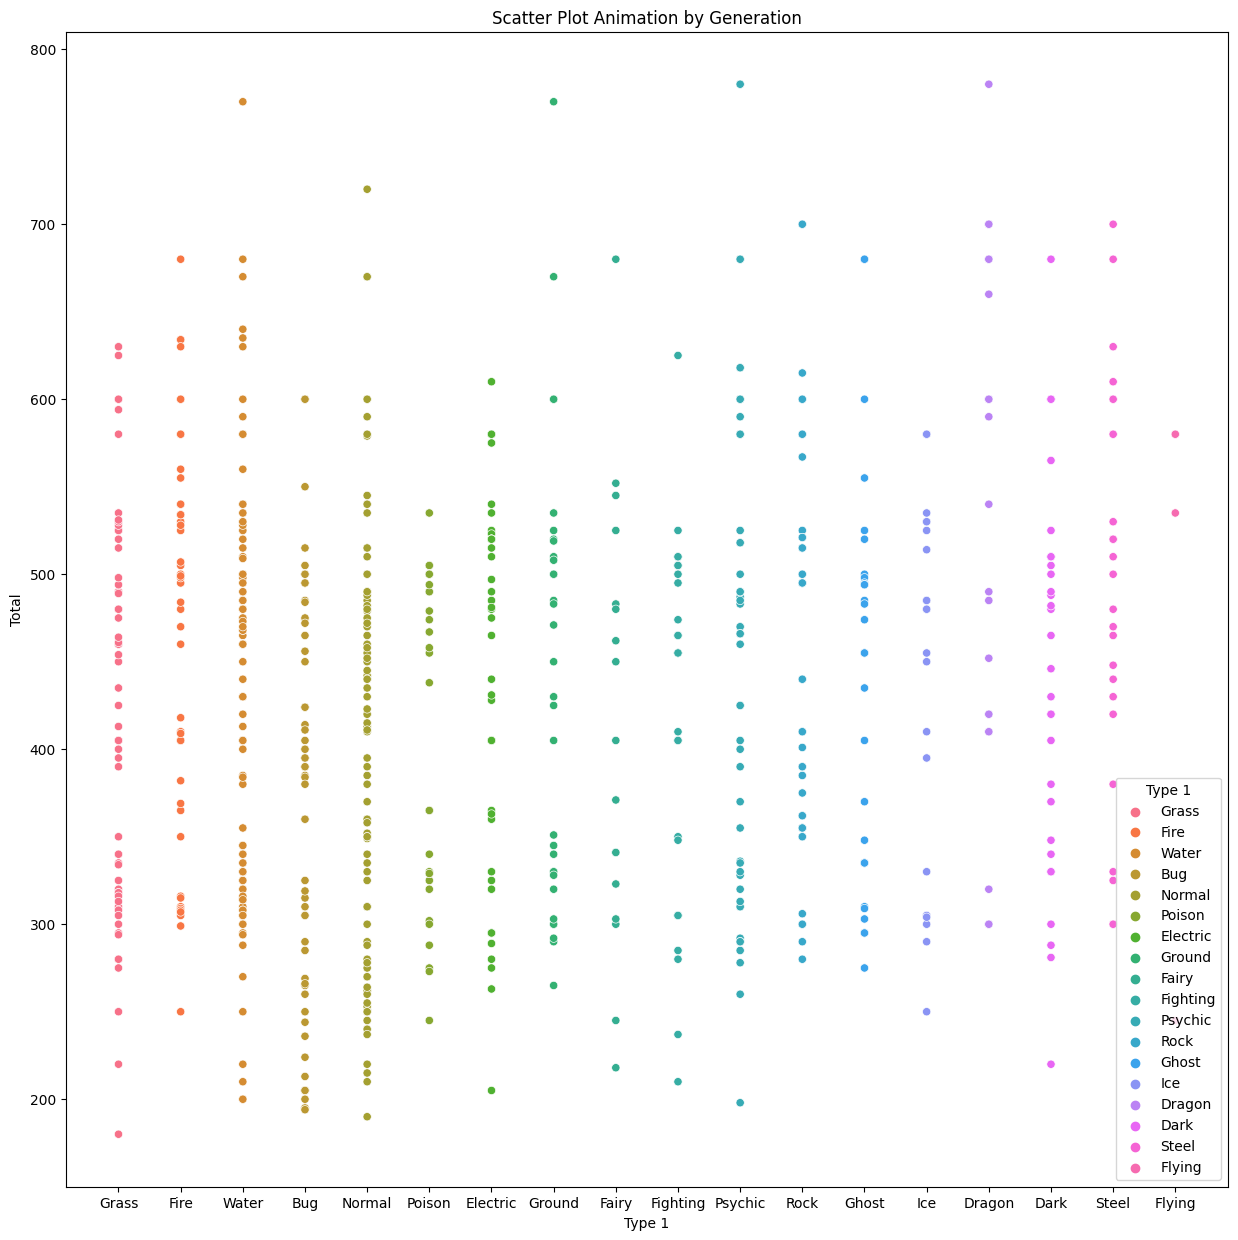

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
# Create the scatter plot
scatter = sns.scatterplot(data=data, x="Type 1", y="Total", hue="Type 1")

# Set the labels and title
scatter.set(xlabel='Type 1', ylabel='Total')
plt.title('Scatter Plot Animation by Generation')

# Define the animation function
def update(frame):
    # Filter the data for the current generation
    generation_data = data[data['Generation'] == frame]
    
    # Update the scatter plot
    scatter.set_offsets(generation_data[["Type 1", "Total"]].values)
    
    # Set the title to the current generation
    plt.title(f'Scatter Plot Animation - Generation {frame}')
    
    return scatter,


# Display the animation
plt.show()

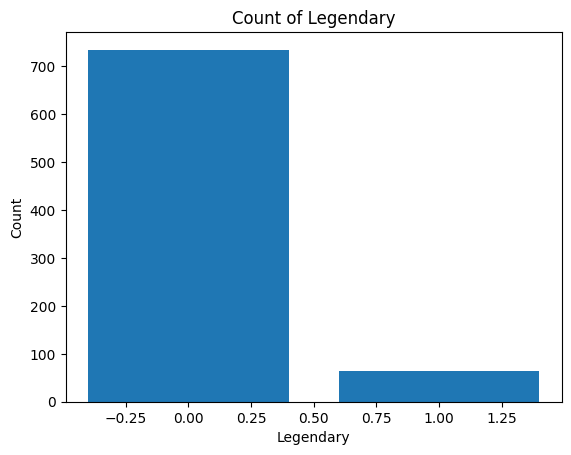

In [11]:
plt.bar(data["Legendary"].value_counts().index, data["Legendary"].value_counts())
plt.xlabel("Legendary")
plt.ylabel("Count")
plt.title("Count of Legendary")
plt.show()

In [12]:
lgdry = data[data['Legendary'] == True].sort_values('Total', ascending=False)
lgdry_tmp = lgdry['Name'].tail(3).values.tolist()
print("Most strongest legendaries :", ', '.join(lgdry_tmp))

Most strongest legendaries : ThundurusTherian Forme, ThundurusIncarnate Forme, Articuno


In [13]:
#data.drop('Name', inplace=True, axis=1)


plt.figure(figsize=(20,15))
corr_data = data.corr()
sns.heatmap(corr_data,annot=True,cmap="Greens")

In [14]:
de = pd.get_dummies(data, columns=["Type 1", "Type 2"])

# Convert "Legendary" column to binary values (1 for True, 0 for False)
de["Legendary"] = de["Legendary"].astype(int)

In [15]:
de

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_None,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,Bulbasaur,318,45,49,49,65,65,45,1,...,False,False,False,False,False,True,False,False,False,False
1,2,Ivysaur,405,60,62,63,80,80,60,1,...,False,False,False,False,False,True,False,False,False,False
2,3,Venusaur,525,80,82,83,100,100,80,1,...,False,False,False,False,False,True,False,False,False,False
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,...,False,False,False,False,False,True,False,False,False,False
4,4,Charmander,309,39,52,43,60,50,65,1,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,600,50,100,150,100,150,50,6,...,False,False,False,False,False,False,False,False,False,False
796,719,DiancieMega Diancie,700,50,160,110,160,110,110,6,...,False,False,False,False,False,False,False,False,False,False
797,720,HoopaHoopa Confined,600,80,110,60,150,130,70,6,...,False,False,False,False,False,False,False,False,False,False
798,720,HoopaHoopa Unbound,680,80,160,60,170,130,80,6,...,False,False,False,False,False,False,False,False,False,False


In [16]:
from sklearn.metrics import roc_auc_score

y = de["Legendary"]
aucs = []

for feature in de.drop(["#", "Name", "Legendary"], axis=1):
    auc = roc_auc_score(y, de[feature])
    aucs.append((feature, auc))

aucs.sort(key=lambda x: x[1], reverse=True)
aucs_df = pd.DataFrame(aucs, columns=["Feature", "AUC"])
TopAucs = aucs_df.head()

print("Top features by ROC AUC score:")
print(TopAucs)

Top features by ROC AUC score:
   Feature       AUC
0    Total  0.968906
1  Sp. Atk  0.893354
2  Sp. Def  0.847650
3   Attack  0.834495
4    Speed  0.830926


In [17]:
#de.drop('Name', inplace=True, axis=1)

In [18]:
de.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_None,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,Bulbasaur,318,45,49,49,65,65,45,1,...,False,False,False,False,False,True,False,False,False,False
1,2,Ivysaur,405,60,62,63,80,80,60,1,...,False,False,False,False,False,True,False,False,False,False
2,3,Venusaur,525,80,82,83,100,100,80,1,...,False,False,False,False,False,True,False,False,False,False
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,1,...,False,False,False,False,False,True,False,False,False,False
4,4,Charmander,309,39,52,43,60,50,65,1,...,False,False,False,True,False,False,False,False,False,False


In [19]:
#Selecting feature column
de.drop('Name', inplace=True, axis=1)

feature = de['Legendary']
de.drop('Legendary', inplace=True, axis=1)

In [20]:

X_train, X_test, Y_train, Y_test = train_test_split(de, feature, random_state = 123, test_size = 0.20)

In [21]:
#Decision Tree

DT = DecisionTreeClassifier(criterion = 'gini',max_depth=7,min_samples_leaf=5, min_samples_split=5)
DT.fit(X_train, Y_train)
y_pred =  DT.predict(X_test)

In [22]:
train_predictions = DT.predict(X_train)
test_predictions = DT.predict(X_test)

train_accuracy = accuracy_score(y_true=Y_train, y_pred=train_predictions)
test_accuracy = accuracy_score(y_true=Y_test, y_pred=test_predictions)

print('Accuracy Score on train data:', train_accuracy)
print('Accuracy Score on the test data:', test_accuracy)

Accuracy Score on train data: 0.9796875
Accuracy Score on the test data: 0.94375


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       146
           1       0.78      0.50      0.61        14

    accuracy                           0.94       160
   macro avg       0.87      0.74      0.79       160
weighted avg       0.94      0.94      0.94       160



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


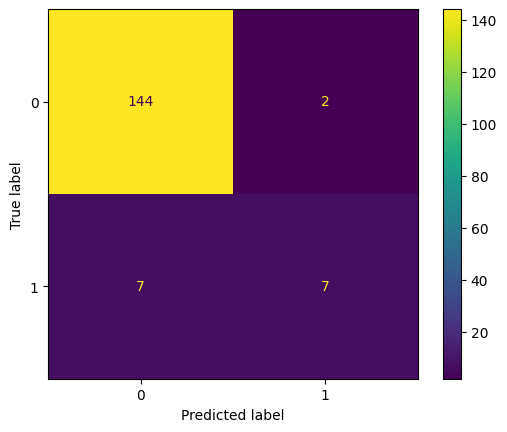

In [23]:
from sklearn.metrics import plot_confusion_matrix
  


from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

plot_confusion_matrix(DT,X_test,Y_test)
cm1 = confusion_matrix(Y_test, y_pred)

AUC score: 0.7431506849315068


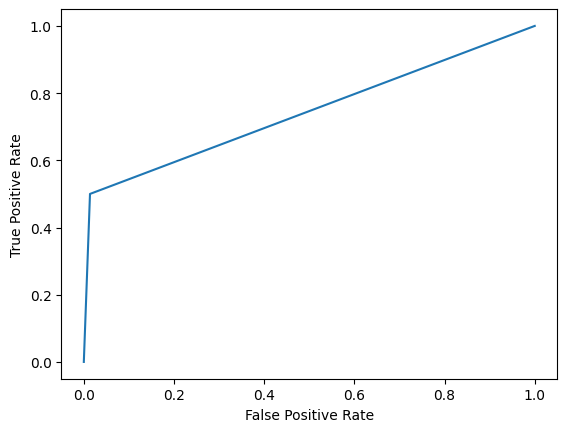

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


from sklearn.metrics import roc_auc_score

plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

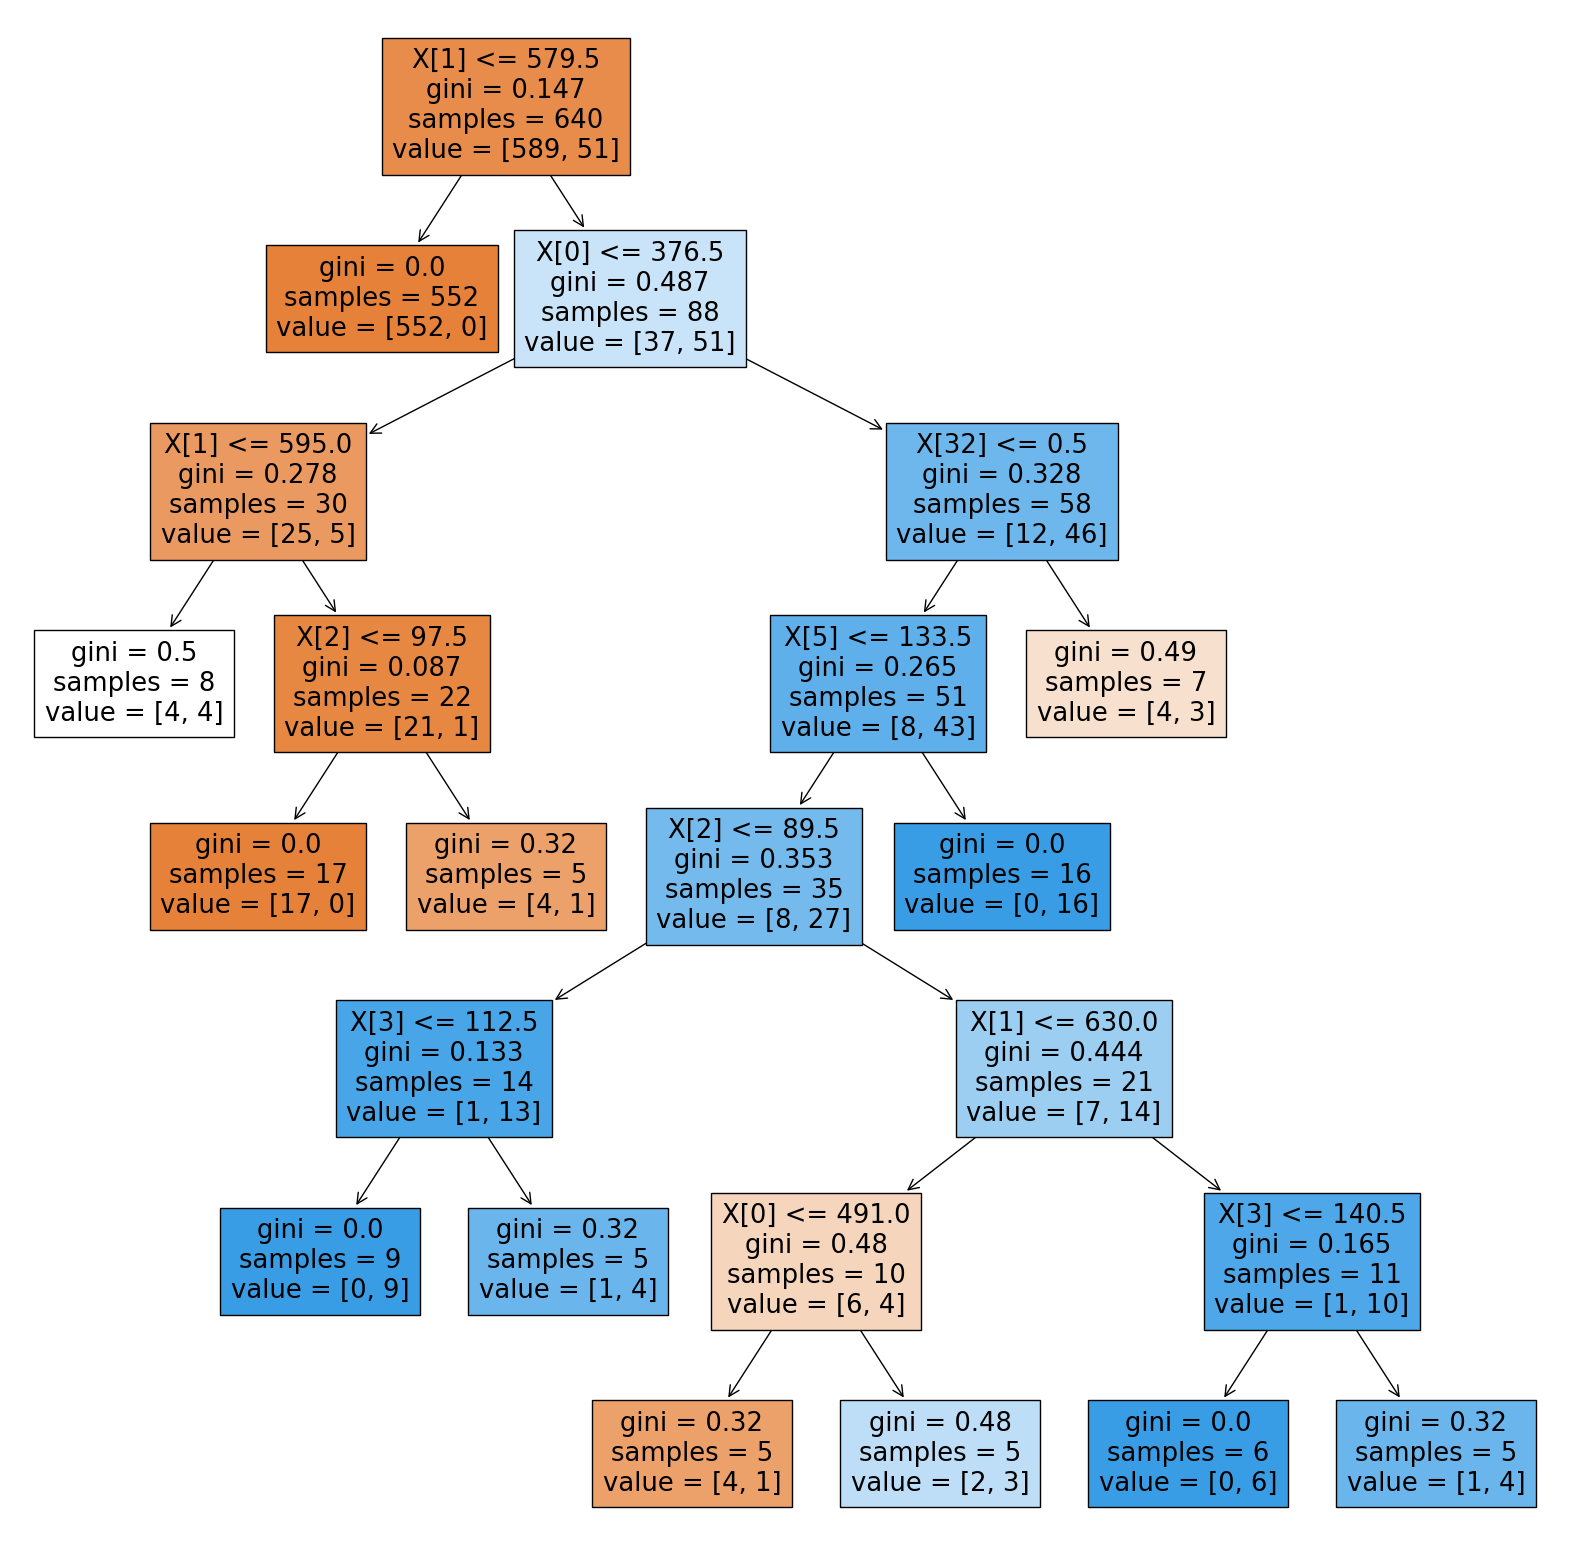

In [25]:
plt.figure(figsize=(20,20))
plot_tree(DT, filled=True)
plt.show()

In [26]:
#Multinomial 

In [27]:
nb = MultinomialNB(alpha=0.2, fit_prior=True, class_prior=None)
nb.fit(X_train, Y_train)
acc=nb.score(X_train, Y_train)
print("Accuracy :",acc)

Accuracy : 0.6203125


In [28]:
y_pred = nb.predict(X_test)
accuracy_score(Y_test, y_pred)
cm2 = confusion_matrix(Y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.62      0.75       146
           1       0.14      0.64      0.23        14

    accuracy                           0.62       160
   macro avg       0.54      0.63      0.49       160
weighted avg       0.88      0.62      0.71       160



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


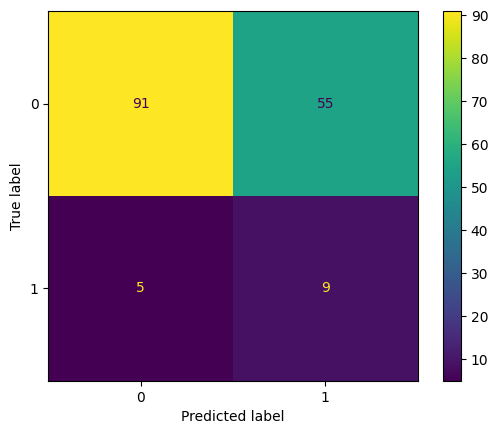

In [29]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

plot_confusion_matrix(nb,X_test,Y_test)
cm1 = confusion_matrix(Y_test, y_pred)


AUC score: 0.6330724070450098


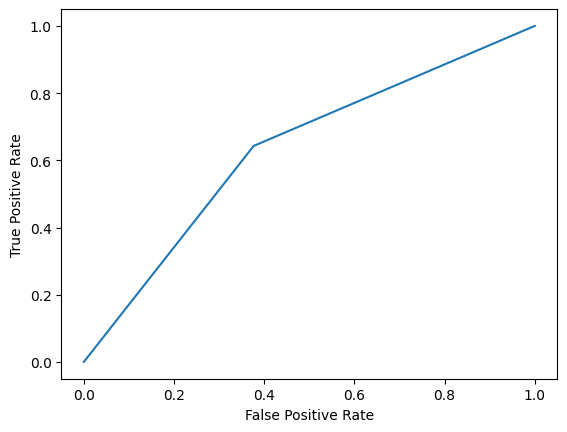

In [30]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

In [31]:
# SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(C=25, kernel='rbf', gamma='scale')


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)

In [32]:
# compute and print accuracy score
acc=accuracy_score(Y_test, y_pred)
print("Accuracy",acc)

Accuracy 0.93125


In [33]:
cm3 = confusion_matrix(Y_test, y_pred)  
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       146
           1       0.62      0.57      0.59        14

    accuracy                           0.93       160
   macro avg       0.79      0.77      0.78       160
weighted avg       0.93      0.93      0.93       160



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


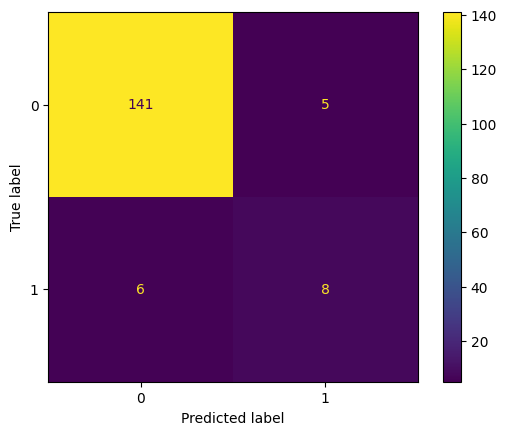

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,X_test,Y_test)

AUC score: 0.7685909980430528


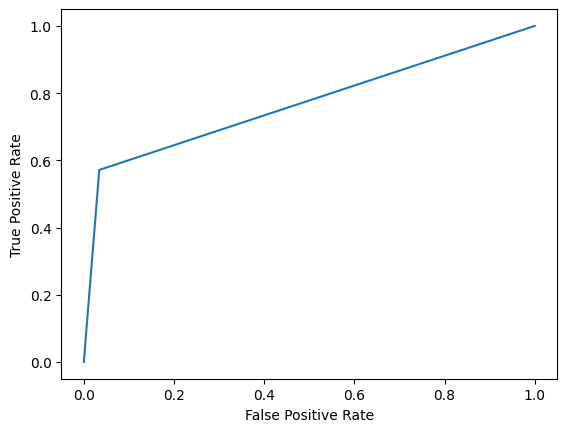

In [35]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

In [36]:
# Perceptron

In [37]:
pn = Perceptron(eta0=0.1, random_state=1, max_iter=100)
pn.fit(X_train, Y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=1)

In [38]:
y_pred = pn.predict(X_test)

In [39]:
# compute and print accuracy score
acc=accuracy_score(Y_test, y_pred)
print("Accuracy",acc)

Accuracy 0.9125


In [40]:
cm4 = confusion_matrix(Y_test, y_pred)  


from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       146
           1       0.00      0.00      0.00        14

    accuracy                           0.91       160
   macro avg       0.46      0.50      0.48       160
weighted avg       0.83      0.91      0.87       160



H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


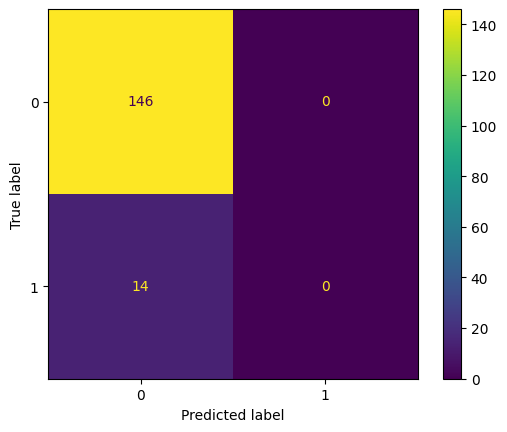

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pn,X_test,Y_test)

AUC score: 0.5


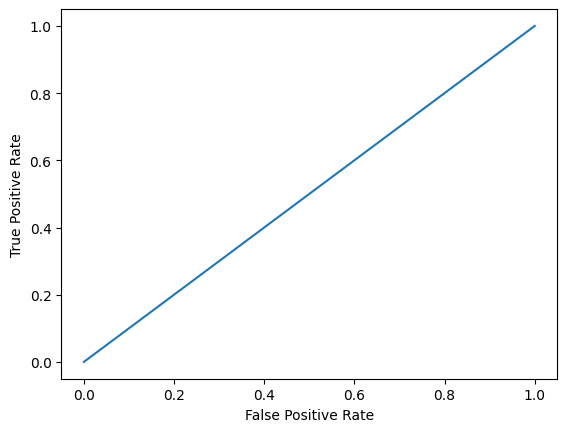

In [42]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

MultinomialNB: 0.5188 (0.0698)
Decision Tree: 0.9656 (0.0168)
Perceptron: 0.9172 (0.0100)
SVC: 0.9203 (0.0047)


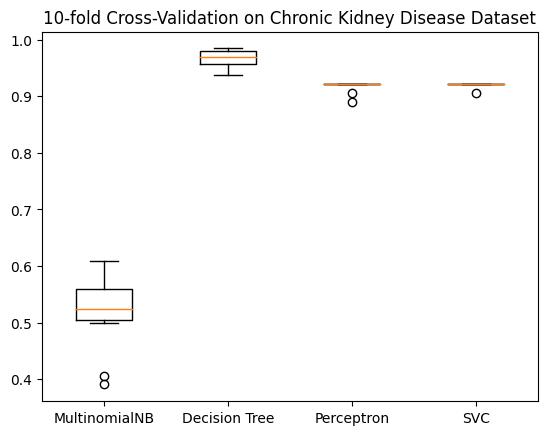

In [43]:

models = [
    ('MultinomialNB', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy')),
    ('Perceptron', Perceptron(eta0=0.1, random_state=0)),
    ('SVC', SVC(gamma='auto'))
]

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})')

plt.boxplot(results, labels=names)
plt.title('10-fold Cross-Validation on Chronic Kidney Disease Dataset')
plt.show()

In [44]:
# Since models are overfitting lets use sampling method to tackle overfitting

## Using random sampling to avoid overfitting issue

In [47]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# define pipeline
stepsDT = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline_DT = Pipeline(steps=stepsDT)

In [48]:
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline_DT, de, feature, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.895


In [49]:
# define pipeline
stepsDT = [('over', SMOTE()), ('model', MultinomialNB())]
pipeline_MNB = Pipeline(steps=stepsDT)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline_MNB, de, feature, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.622


In [50]:
# define pipeline
stepsDT = [('over', SMOTE()), ('model', SVC(gamma='auto'))]
pipeline_SVC = Pipeline(steps=stepsDT)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline_SVC, de, feature, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.865


In [51]:
# define pipeline
stepsDT = [('over', SMOTE()), ('model', GaussianNB())]
pipeline_GNB = Pipeline(steps=stepsDT)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline_GNB, de, feature, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.818


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(de, feature, random_state = 123, test_size = 0.20)

In [53]:
#Using Smote to balance the data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [54]:
#Decision Tree

DT = DecisionTreeClassifier(criterion = 'gini',max_depth=7,min_samples_leaf=5, min_samples_split=5)
DT.fit(X_train, Y_train)
y_pred =  DT.predict(X_test)

In [55]:
train_predictions = DT.predict(X_train)
test_predictions = DT.predict(X_test)

train_accuracy = accuracy_score(y_true=Y_train, y_pred=train_predictions)
test_accuracy = accuracy_score(y_true=Y_test, y_pred=test_predictions)

print('Accuracy Score on train data:', train_accuracy)
print('Accuracy Score on the test data:', test_accuracy)

Accuracy Score on train data: 0.9898132427843803
Accuracy Score on the test data: 0.94375


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       146
           1       0.67      0.71      0.69        14

    accuracy                           0.94       160
   macro avg       0.82      0.84      0.83       160
weighted avg       0.95      0.94      0.94       160



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


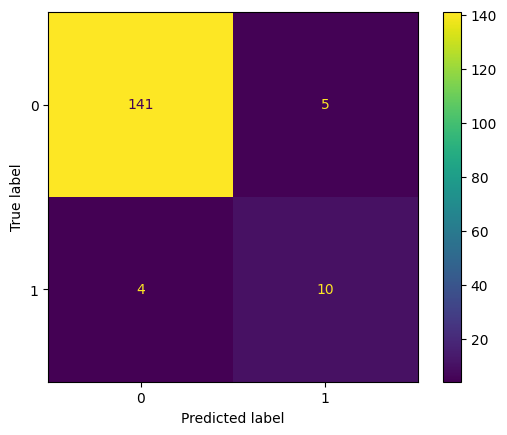

In [56]:
from sklearn.metrics import plot_confusion_matrix
  


from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

plot_confusion_matrix(DT,X_test,Y_test)
cm1 = confusion_matrix(Y_test, y_pred)

AUC score: 0.8400195694716243


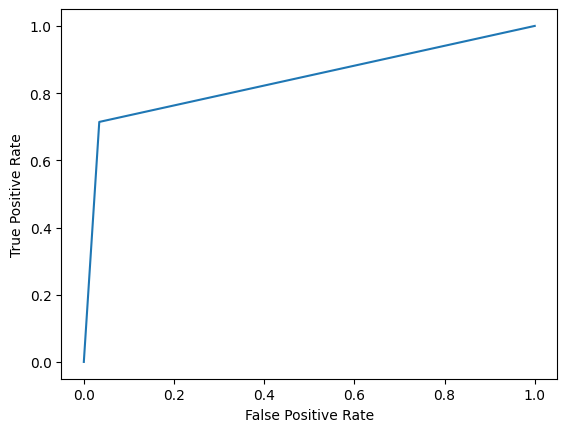

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


from sklearn.metrics import roc_auc_score

plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

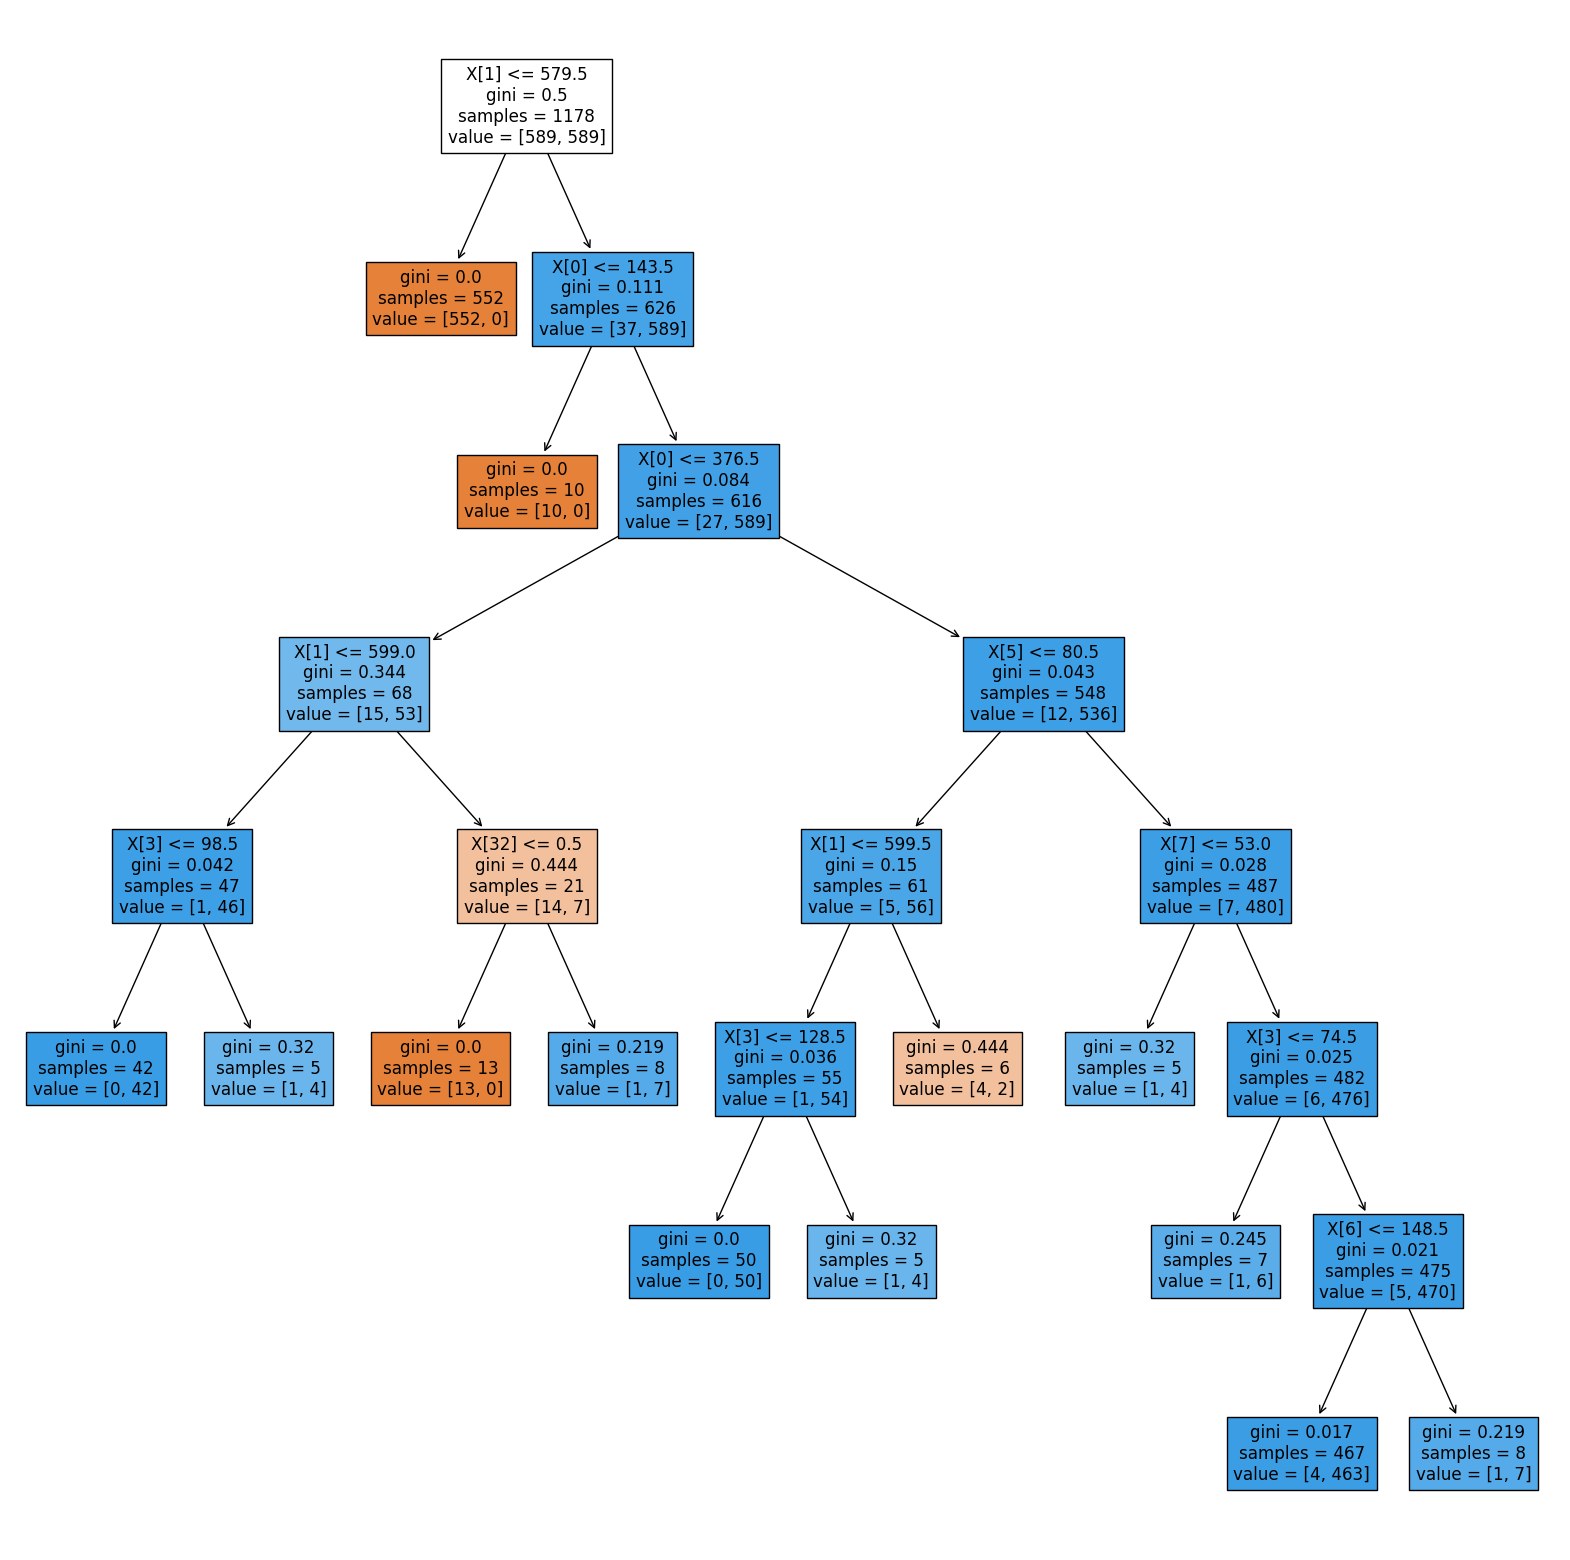

In [58]:
plt.figure(figsize=(20,20))
plot_tree(DT, filled=True)
plt.show()

In [ ]:
#Multinomial 

In [59]:
nb = MultinomialNB(alpha=0.2, fit_prior=True, class_prior=None)
nb.fit(X_train, Y_train)
acc=nb.score(X_train, Y_train)
print("Accuracy :",acc)

Accuracy : 0.6061120543293718


In [60]:
y_pred = nb.predict(X_test)
accuracy_score(Y_test, y_pred)
cm2 = confusion_matrix(Y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.60      0.74       146
           1       0.16      0.79      0.27        14

    accuracy                           0.62       160
   macro avg       0.56      0.69      0.50       160
weighted avg       0.90      0.62      0.70       160



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


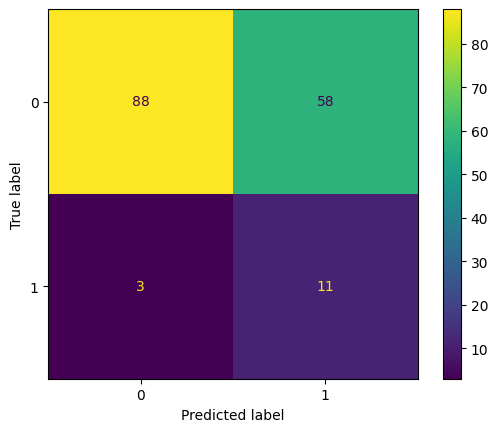

In [61]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

plot_confusion_matrix(nb,X_test,Y_test)
cm1 = confusion_matrix(Y_test, y_pred)


AUC score: 0.6942270058708414


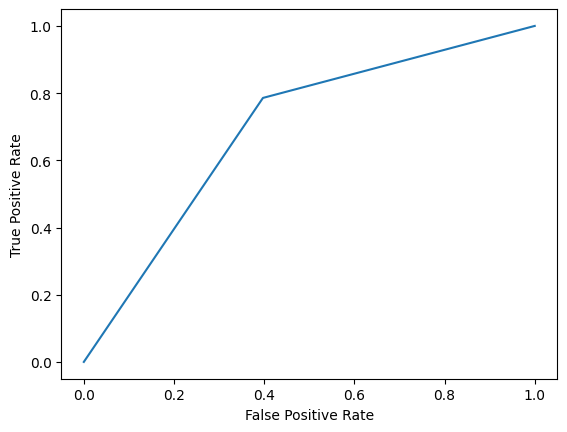

In [62]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

In [63]:
# SVC
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(C=25, kernel='rbf', gamma='scale')


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)

In [64]:
# compute and print accuracy score
acc=accuracy_score(Y_test, y_pred)
print("Accuracy",acc)

Accuracy 0.94375


In [65]:
cm3 = confusion_matrix(Y_test, y_pred)  
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       146
           1       0.61      1.00      0.76        14

    accuracy                           0.94       160
   macro avg       0.80      0.97      0.86       160
weighted avg       0.97      0.94      0.95       160



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


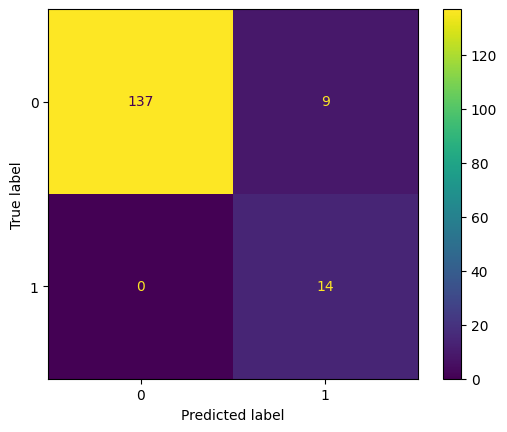

In [66]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,X_test,Y_test)

AUC score: 0.9691780821917808


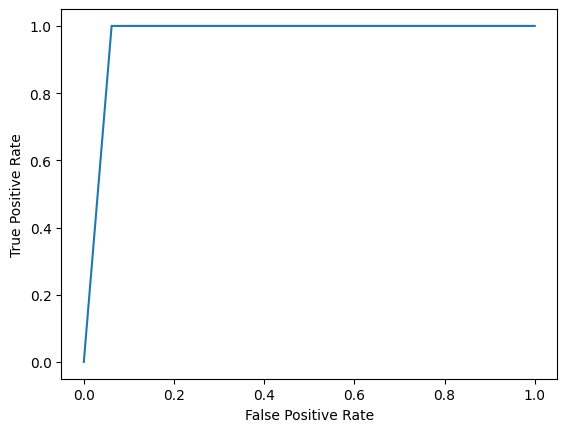

In [67]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

In [ ]:
# Perceptron

In [68]:
pn = Perceptron(eta0=0.1, random_state=1, max_iter=100)
pn.fit(X_train, Y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=1)

In [69]:
y_pred = pn.predict(X_test)

In [70]:
# compute and print accuracy score
acc=accuracy_score(Y_test, y_pred)
print("Accuracy",acc)

Accuracy 0.31875


In [71]:
cm4 = confusion_matrix(Y_test, y_pred)  


from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.27      0.42       146
           1       0.10      0.86      0.18        14

    accuracy                           0.32       160
   macro avg       0.53      0.56      0.30       160
weighted avg       0.88      0.32      0.40       160



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


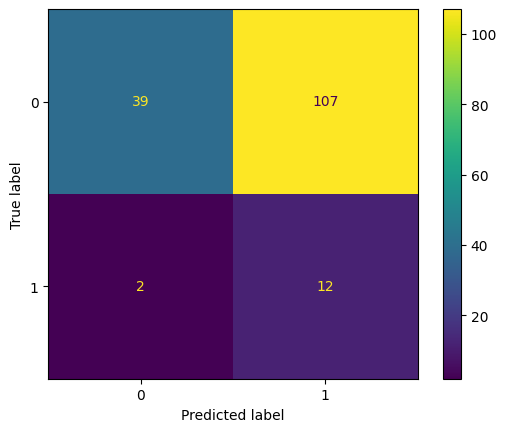

In [72]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pn,X_test,Y_test)

AUC score: 0.562133072407045


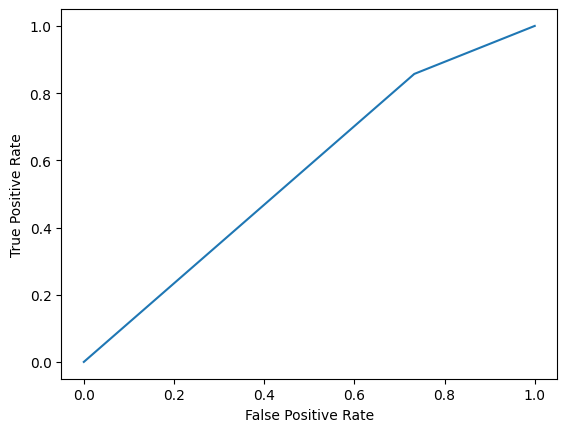

In [73]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

MultinomialNB: 0.7716 (0.0145)
Decision Tree: 0.9771 (0.0132)
Perceptron: 0.5280 (0.0457)
SVC: 0.8463 (0.0295)


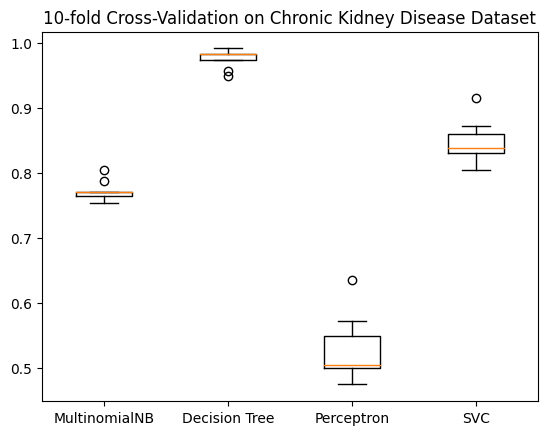

In [74]:

models = [
    ('MultinomialNB', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy')),
    ('Perceptron', Perceptron(eta0=0.1, random_state=0)),
    ('SVC', SVC(gamma='auto'))
]

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})')

plt.boxplot(results, labels=names)
plt.title('10-fold Cross-Validation')
plt.show()